In [1]:
from quantrocket.codeload import clone
clone("moonshot-intro", skip_existing=True)

{'status': 'successfully cloned moonshot-intro', 'files': {}}

In [2]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d-new1", bar_size="1 day", free=True) #db name : usstock-free-1d-new1

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d-new1.sqlite'}

In [3]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d-new1")

{'status': 'the historical data will be collected asynchronously'}

In [4]:
from quantrocket.master import get_securities
# by specifying sec_types='STK', we exclude ETFs, which are present in the sample data 
securities = get_securities(vendors="usstock", sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT


In [6]:

#universe creation
from quantrocket.master import create_universe
create_universe("usstock-free-new1", sids=securities.index.tolist())
#universe name - usstock free

{'code': 'usstock-free-new1',
 'provided': 8,
 'inserted': 8,
 'total_after_insert': 8}

In [7]:
#filter the specific columns
filtered_securities = securities[securities.Delisted==False]
# also limit the number of columns for readability
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities.head()

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False
FIBBG000BKZB36,HD,XNYS,HOME DEPOT INC,False
FIBBG000BMHYD1,JNJ,XNYS,JOHNSON & JOHNSON,False
FIBBG000BPH459,MSFT,XNAS,MICROSOFT CORP,False
FIBBG000GZQ728,XOM,XNYS,EXXON MOBIL CORP,False


In [8]:
#Then we can create a universe from the filtered securities.

create_universe("usstock-free-active1", sids=filtered_securities.index.tolist())

{'code': 'usstock-free-active1',
 'provided': 6,
 'inserted': 6,
 'total_after_insert': 6}

In [10]:
from quantrocket import get_prices
import pandas as pd
prices = get_prices("usstock-free-1d-new", universes="usstock-free-new", start_date="2023-01-01",end_date="2023-12-31",sids="FIBBG000B9XRY4", fields=["Close"])
pd.set_option("display.max_rows", None)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns
print(prices)

Sid               FIBBG000B9XRY4  FIBBG000BKZB36  FIBBG000BMHYD1  \
Field Date                                                         
Close 2023-01-03        124.2163        305.5299        171.6388   
      2023-01-04        125.4975        309.2243        173.5075   
      2023-01-05        124.1666        305.1043        172.2264   
      2023-01-06        128.7352        307.0966        173.6231   
      2023-01-09        129.2616        307.3674        169.1248   
      2023-01-10        129.8377        310.0948        168.7202   
      2023-01-11        132.5788        318.1897        168.4505   
      2023-01-12        132.4994        319.0312        167.6029   
      2023-01-13        133.8402        320.3271        167.0539   
      2023-01-17        135.0121        316.7680        166.0232   
      2023-01-18        134.2871        313.0542        163.5188   
      2023-01-19        134.3467        300.6651        163.2972   
      2023-01-20        136.9289        304.6498

In [11]:
print(prices.columns)

Index(['FIBBG000B9XRY4', 'FIBBG000BKZB36', 'FIBBG000BMHYD1', 'FIBBG000BPH459',
       'FIBBG000GZQ728', 'FIBBG00B3T3HD3'],
      dtype='object', name='Sid')


In [12]:
aapl = prices['FIBBG000B9XRY4']
#print(aapl)

#values of the date
values=[]
i=0
while(i<len(aapl)):
    values.append(aapl[i])
    i=i+1
print(values)
#values of the date

[124.2163, 125.4975, 124.1666, 128.7352, 129.2616, 129.8377, 132.5788, 132.4994, 133.8402, 135.0121, 134.2871, 134.3467, 136.9289, 140.1468, 141.5571, 140.8917, 142.9774, 144.9339, 142.0239, 143.3051, 144.4373, 149.7905, 153.4454, 150.6943, 153.5944, 150.883, 149.8402, 150.2082, 153.0332, 152.3866, 154.5053, 152.8939, 151.7401, 147.6917, 148.1194, 148.6068, 145.9311, 147.1346, 146.6273, 144.5385, 145.1353, 150.2281, 153.0133, 150.7951, 152.0584, 149.7905, 147.7116, 149.6711, 151.7798, 152.1777, 155.0225, 154.177, 156.5643, 158.4343, 156.992, 158.0862, 159.3992, 157.4396, 156.813, 159.9164, 161.498, 164.0245, 165.2877, 164.7506, 162.8905, 163.7858, 161.1697, 159.9463, 159.25, 164.681, 164.3328, 164.3527, 165.5861, 166.74, 165.7652, 164.1438, 164.4522, 162.9005, 162.8905, 167.5158, 168.7791, 168.6896, 167.6452, 166.5609, 164.9098, 172.6485, 172.5788, 170.858, 172.6335, 172.8275, 171.8912, 171.3932, 171.3932, 172.0107, 174.3614, 174.471, 173.5148, 170.8852, 171.1641, 172.3095, 174.7399, 1

In [13]:
date = ["2023-01-03", "2023-01-04", "2023-01-05", "2023-01-06", "2023-01-09",
        "2023-01-10", "2023-01-11", "2023-01-12", "2023-01-13", "2023-01-17",
        "2023-01-18", "2023-01-19", "2023-01-20", "2023-01-23", "2023-01-24",
        "2023-01-25", "2023-01-26", "2023-01-27", "2023-01-30", "2023-01-31",
        "2023-02-01", "2023-02-02", "2023-02-03", "2023-02-06", "2023-02-07",
        "2023-02-08", "2023-02-09", "2023-02-10", "2023-02-13", "2023-02-14",
        "2023-02-15", "2023-02-16", "2023-02-17", "2023-02-21", "2023-02-22",
        "2023-02-23", "2023-02-24", "2023-02-27", "2023-02-28", "2023-03-01",
        "2023-03-02", "2023-03-03", "2023-03-06", "2023-03-07", "2023-03-08",
        "2023-03-09", "2023-03-10", "2023-03-13", "2023-03-14", "2023-03-15",
        "2023-03-16", "2023-03-17", "2023-03-20", "2023-03-21", "2023-03-22",
        "2023-03-23", "2023-03-24", "2023-03-27", "2023-03-28", "2023-03-29",
        "2023-03-30", "2023-03-31", "2023-04-03", "2023-04-04", "2023-04-05",
        "2023-04-06", "2023-04-10", "2023-04-11", "2023-04-12", "2023-04-13",
        "2023-04-14", "2023-04-17", "2023-04-18", "2023-04-19", "2023-04-20",
        "2023-04-21", "2023-04-24", "2023-04-25", "2023-04-26", "2023-04-27",
        "2023-04-28", "2023-05-01", "2023-05-02", "2023-05-03", "2023-05-04",
        "2023-05-05", "2023-05-08", "2023-05-09", "2023-05-10", "2023-05-11",
        "2023-05-12", "2023-05-15", "2023-05-16", "2023-05-17", "2023-05-18",
        "2023-05-19", "2023-05-22", "2023-05-23", "2023-05-24", "2023-05-25",
        "2023-05-26", "2023-05-30", "2023-05-31", "2023-06-01", "2023-06-02",
        "2023-06-05", "2023-06-06", "2023-06-07", "2023-06-08", "2023-06-09",
        "2023-06-12", "2023-06-13", "2023-06-14", "2023-06-15", "2023-06-16",
        "2023-06-20", "2023-06-21", "2023-06-22", "2023-06-23", "2023-06-26",
        "2023-06-27", "2023-06-28", "2023-06-29", "2023-06-30", "2023-07-03",
        "2023-07-05", "2023-07-06", "2023-07-07", "2023-07-10", "2023-07-11",
        "2023-07-12", "2023-07-13", "2023-07-14", "2023-07-17", "2023-07-18",
        "2023-07-19", "2023-07-20", "2023-07-21", "2023-07-24", "2023-07-25",
        "2023-07-26", "2023-07-27", "2023-07-28", "2023-07-31", "2023-08-01",
        "2023-08-02", "2023-08-03", "2023-08-04", "2023-08-07", "2023-08-08",
        "2023-08-09", "2023-08-10", "2023-08-11", "2023-08-14", "2023-08-15",
        "2023-08-16", "2023-08-17", "2023-08-18", "2023-08-21", "2023-08-22",
        "2023-08-23", "2023-08-24", "2023-08-25", "2023-08-28", "2023-08-29",
        "2023-08-30", "2023-08-31", "2023-09-01", "2023-09-05", "2023-09-06",
        "2023-09-07", "2023-09-08", "2023-09-11", "2023-09-12", "2023-09-13",
        "2023-09-14", "2023-09-15", "2023-09-18", "2023-09-19", "2023-09-20",
        "2023-09-21", "2023-09-22", "2023-09-25", "2023-09-26", "2023-09-27",
        "2023-09-28", "2023-09-29", "2023-10-02", "2023-10-03", "2023-10-04",
        "2023-10-05", "2023-10-06", "2023-10-09", "2023-10-10", "2023-10-11",
        "2023-10-12", "2023-10-13", "2023-10-16", "2023-10-17", "2023-10-18",
        "2023-10-19", "2023-10-20", "2023-10-23", "2023-10-24", "2023-10-25",
        "2023-10-26", "2023-10-27", "2023-10-30", "2023-10-31", "2023-11-01",
        "2023-11-02", "2023-11-03", "2023-11-06", "2023-11-07", "2023-11-08",
        "2023-11-09", "2023-11-10", "2023-11-13", "2023-11-14", "2023-11-15",
        "2023-11-16", "2023-11-17", "2023-11-20", "2023-11-21", "2023-11-22",
        "2023-11-24", "2023-11-27", "2023-11-28", "2023-11-29", "2023-11-30",
        "2023-12-01", "2023-12-04", "2023-12-05", "2023-12-06", "2023-12-07",
        "2023-12-08", "2023-12-11", "2023-12-12", "2023-12-13", "2023-12-14",
        "2023-12-15", "2023-12-18", "2023-12-19", "2023-12-20", "2023-12-21",
        "2023-12-22", "2023-12-26", "2023-12-27", "2023-12-28", "2023-12-29"
    ]

data = {"Date" : date,"FIBBG000B9XRY4" : values}

print(data)

{'Date': ['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-1

In [14]:
df = pd.DataFrame(data)

In [15]:
df["Date"] = pd.to_datetime(df["Date"])

# Set "Date" column as index
df.set_index("Date", inplace=True)

In [16]:
print(df)

            FIBBG000B9XRY4
Date                      
2023-01-03        124.2163
2023-01-04        125.4975
2023-01-05        124.1666
2023-01-06        128.7352
2023-01-09        129.2616
2023-01-10        129.8377
2023-01-11        132.5788
2023-01-12        132.4994
2023-01-13        133.8402
2023-01-17        135.0121
2023-01-18        134.2871
2023-01-19        134.3467
2023-01-20        136.9289
2023-01-23        140.1468
2023-01-24        141.5571
2023-01-25        140.8917
2023-01-26        142.9774
2023-01-27        144.9339
2023-01-30        142.0239
2023-01-31        143.3051
2023-02-01        144.4373
2023-02-02        149.7905
2023-02-03        153.4454
2023-02-06        150.6943
2023-02-07        153.5944
2023-02-08        150.8830
2023-02-09        149.8402
2023-02-10        150.2082
2023-02-13        153.0332
2023-02-14        152.3866
2023-02-15        154.5053
2023-02-16        152.8939
2023-02-17        151.7401
2023-02-21        147.6917
2023-02-22        148.1194
2

In [17]:
df["Returns"] = df["FIBBG000B9XRY4"].pct_change()
def classify_state(returns):
    if returns >= 0.01:
        return 1
    elif returns > -0.01:
        return 0
    else:
        return -1

# Apply state classification to compute states
df["State"] = df["Returns"].apply(classify_state)

print(df)

            FIBBG000B9XRY4   Returns  State
Date                                       
2023-01-03        124.2163       NaN     -1
2023-01-04        125.4975  0.010314      1
2023-01-05        124.1666 -0.010605     -1
2023-01-06        128.7352  0.036794      1
2023-01-09        129.2616  0.004089      0
2023-01-10        129.8377  0.004457      0
2023-01-11        132.5788  0.021112      1
2023-01-12        132.4994 -0.000599      0
2023-01-13        133.8402  0.010119      1
2023-01-17        135.0121  0.008756      0
2023-01-18        134.2871 -0.005370      0
2023-01-19        134.3467  0.000444      0
2023-01-20        136.9289  0.019220      1
2023-01-23        140.1468  0.023501      1
2023-01-24        141.5571  0.010063      1
2023-01-25        140.8917 -0.004701      0
2023-01-26        142.9774  0.014804      1
2023-01-27        144.9339  0.013684      1
2023-01-30        142.0239 -0.020078     -1
2023-01-31        143.3051  0.009021      0
2023-02-01        144.4373  0.00

In [45]:
import numpy as np

num_states = 3  # Number of possible states: -1, 0, 1
transition_counts = {(prev_state, curr_state): 0 for prev_state in range(-1, 2) for curr_state in range(-1, 2)}
Q = np.zeros((num_states, num_states))
portfolio_value = 0


alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

# Function to update transition counts, Q-values, and portfolio value
def update_transitions_and_Q(prev_state, curr_state):
    transition_counts[(prev_state, curr_state)] += 1
    
    # Convert states to integer indices
    prev_state_index = int(prev_state) + 1
    curr_state_index = int(curr_state) + 1
    
    # Update Q-value using Q-learning update rule
    max_future_reward = np.max(Q[curr_state_index])
    Q[prev_state_index, curr_state_index] += alpha * (1 + gamma * max_future_reward - Q[prev_state_index, curr_state_index])
    
    # Calculate transition probabilities and make buy decision
    total_transitions = sum(transition_counts.values())
    transition_distribution = {(prev, curr): count / total_transitions for (prev, curr), count in transition_counts.items()}
    
    # Make decision to buy based on transition probabilities
    if transition_distribution[(prev_state, 1)] > transition_distribution[(prev_state, -1)]:
        return 1  # Buy decision
    else:
        return 0  # No buy decision


# Iterate through the DataFrame and update transition counts, Q-values, and portfolio value
for i in range(1, len(df)):
    prev_state = df.iloc[i - 1]["State"]
    curr_state = df.iloc[i]["State"]
    
    # Update portfolio value based on buy decision
    buy_decision = update_transitions_and_Q(prev_state, curr_state)
    if buy_decision:
        if curr_state == 1:
            portfolio_value += 1  # Increase portfolio value by 1 for Bull state
        elif curr_state == -1:
            portfolio_value -= 1  # Decrease portfolio value by 1 for Bear state
    '''print(f"Iteration {i}:")
    print("Transition Distribution:")
    print(transition_distribution)
    print("Portfolio Value:", portfolio_value)
    print("======================================")'''

# Output results
print("output : ")
print("Transition Distribution:")
print(transition_distribution)
print("Portfolio Value:", portfolio_value)


output : 
Transition Distribution:
{(-1, -1): 0.020080321285140562, (-1, 0): 0.10441767068273092, (-1, 1): 0.020080321285140562, (0, -1): 0.09236947791164658, (0, 0): 0.37751004016064255, (0, 1): 0.1606425702811245, (1, -1): 0.028112449799196786, (1, 0): 0.15261044176706828, (1, 1): 0.04417670682730924}
Portfolio Value: 23


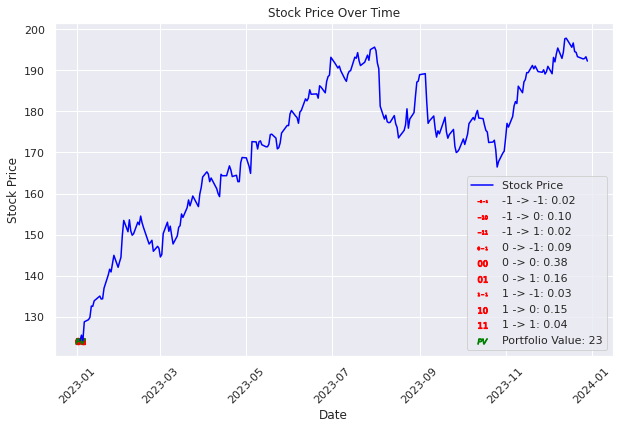

In [42]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['FIBBG000B9XRY4'], label='Stock Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Mark transition distribution points
for transition, probability in transition_distribution.items():
    prev_state, curr_state = transition
    plt.scatter(df.index[0], df['FIBBG000B9XRY4'].min(), marker=f"${prev_state}{curr_state}$", label=f'{prev_state} -> {curr_state}: {probability:.2f}', color='red', s=100)

# Mark portfolio value
plt.scatter(df.index[0], df['FIBBG000B9XRY4'].min(), marker='$PV$', label=f'Portfolio Value: {portfolio_value}', color='green', s=100)

plt.legend()
plt.xticks(rotation=45)

plt.show()
